<h1 align=center><font size = 5>Data Science amb Python</font></h1>



## Sprint 16 
#### S16 T01: Pipelines, grid search i text mining

#### Cristiane de Souza da Silva

Juny 2021

**Descripción
Comenzamos a familiarizarnos con Pipelines, grid search y text mining !!! Empezamos con unos cuantos ejercicios básicos**

## Nivel 1

### - Ejercicio 1
**Coge el conjunto de datos que quieras y realiza un pipeline y un gridsearch aplicando el algoritmo de Random Forest.**

El dataset escojido fue obtido en el sito Kaggle ([dataset](https://www.kaggle.com/blastchar/telco-customer-churn)).


El conjunto de datos incluye información sobre:

* Clientes que se fueron en el último mes: la columna se llama **Churn**

* Servicios a los que se ha suscrito cada cliente: teléfono, varias líneas, Internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.

* Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.

* Información demográfica sobre los clientes: sexo (gender), rango de edad (age range) y si tienen socios (Partners) y dependientes(Dependents)

In [1]:
# Importar las librerias

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Importar el dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Informaciones sobre los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Hay 7043 entradas, 21 colunas y nungun valor faltante.

Desafortunadamente, Random Forest de Sklearn no manejan variables categóricas.
El siguiente código convierte *strings* en valores booleanos . 

In [4]:
# Primero, vamos eliminar algunas colunas qui non serian necesarias
df_transform = df.copy()

df_transform = df_transform.drop(['customerID', 'PhoneService',
                                  'MultipleLines', 'OnlineSecurity','DeviceProtection',
                                  'TechSupport','StreamingTV','StreamingMovies',
                                  'PaperlessBilling','MonthlyCharges', 'TotalCharges'],
                                  axis=1)
df_transform.shape

(7043, 10)

In [5]:
#Remover la coluna "Churn"

df_transform_no_churn = df_transform.drop('Churn', axis=1)

In [6]:
# Seleccionar los object (string) 
mask = df_transform_no_churn.dtypes == np.object
categorical_cols = df_transform_no_churn.columns[mask]

In [7]:
# Determine how many extra columns would be created
num_ohc_cols = (df_transform_no_churn[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is quite a few extra columns!
small_num_ohc_cols.sum()

12

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
df_data_ohc = df_transform_no_churn.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(df_data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    df_data_ohc = df_data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=df_data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    df_data_ohc = pd.concat([df_data_ohc, new_df], axis=1)

In [9]:
df_data_ohc.head()

,SeniorCitizen,tenure,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Contract_0,Contract_1,Contract_2,OnlineBackup_0,...,OnlineBackup_2,InternetService_0,InternetService_1,InternetService_2,Dependents_0,Dependents_1,Partner_0,Partner_1,gender_0,gender_1
0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0,34,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,45,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
# Dividir los datos

X = df_data_ohc.copy()

churn_result = df['Churn']
y = np.where(churn_result == 'Yes',1,0)

La coluna 'Churn' será el nuestro target.  Vamos verificar si sus valores estan balanceados

In [11]:
print(X.shape)
print(y.shape)

(7043, 21)
(7043,)


In [12]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5174, 1869]))

Hay 5174 valores para no churn y 1869 valores para churn. O sea, hay más clientes que se quedan.

#### Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [14]:
steps=[('scale',StandardScaler()), 
      ('random', RandomForestClassifier())]

pipeline = Pipeline(steps)

El parámetro de estratificación conservará la proporción de objetivo como en el conjunto de datos original, en el tren y en los conjuntos de datos de prueba también.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify = y)

Para el modelo Random Forest, voy a  utilizar  los parametros **max_depth, min_samples_leaf, n_estimators**.

In [16]:
parameters = [
    {'random__max_depth':[5 ,10, 15, 25],
              'random__min_samples_leaf':[1, 2, 4, 8],
             'random__n_estimators':[100, 300, 400, 700],
    'random__min_samples_split':[5, 10, 20, 50]}]

Ahora utilizaremos el **GridSearchCV** con el pipeline y cross validation con 4 pliegues.

In [17]:
grid = GridSearchCV(pipeline, param_grid = parameters, cv = 4)

In [18]:
grid.fit(X_train, y_train)

print( "score = %3.2f" %(grid.score(X_test, y_test)))

print(grid.best_estimator_)

score = 0.79
Pipeline(steps=[('scale', StandardScaler()),
                ('random',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=8,
                                        min_samples_split=50,
                                        n_estimators=300))])


Podemos ver que la mejor putaje del modelo Random Forest fue de 0.79 con los parametros max_depth=25, min_samples_leaf=4, min_samples_split=50, y n_estimators=700.

In [19]:
# Vamos predecir

rf = RandomForestClassifier(max_depth=25, min_samples_leaf=4, min_samples_split=50,
                                        n_estimators=700).fit(X_train, y_train)
yhat_rf = rf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_rf, labels=[1,0]))

[[ 217  250]
 [ 125 1169]]


Confusion matrix, without normalization
[[ 217  250]
 [ 125 1169]]


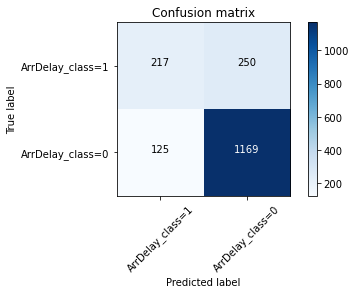

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_rf, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ArrDelay_class=1','ArrDelay_class=0'],
                      normalize= False,  title='Confusion matrix')


El clasificador previó **217** casos abandono dde los clientes **(true positive)**, y **125** fueron previstos como abandono( positivos )pero en realidad eran no abandono **(false positives)**.


Por otro lado, **1169** casos donde no hube abandno de los clientes  fueron previstos correctamente (true negative) pero **250** casos que eran positivos pero fureon previstos como negativos **(false negativos)**.


In [22]:
print (classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1294
           1       0.63      0.46      0.54       467

    accuracy                           0.79      1761
   macro avg       0.73      0.68      0.70      1761
weighted avg       0.77      0.79      0.78      1761



La precision del los positivos y negativos son  0.62 y 0.83 respectivamente. Entre todos las situacions  que el clasificador previó como abandono, 63% estavan certos. 

El recall de esta analise fue de 0.46 para las situacions  en que  hubo abandono e los clientes. Entre los casos donde **realmente no hubo abandono** , **90%** fueron previstos como tal. 

La precisión promedio para este clasificador es el promedio de la puntuación F1 para ambas etiquetas, que es 0.78 en nuestro caso.

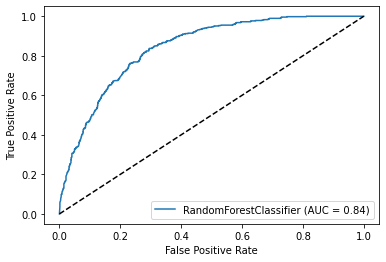

In [23]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


metrics.plot_roc_curve(rf, X_test, y_test)  
plt.plot([0, 1], [0, 1], 'k--')
plt.show()                                   

Cuanto mayor es la recuperación (True Positive Rate), más falsos positivos (False Positive Rate) produce el clasificador. Nuestro clasificaor es un bueno por que esta lejos de la línea e puntos que representa la curva ROC (hacia la esquina superior izquierda).

En neste dataset,  hay casi tres vezes más negativos  (5174) en comparación con los positivos (1869). La curva precision/recall  deja claro que el clasificador tiene margen de mejora (la curva podría estar más cerca de la esquina superior izquierda).

### - Ejercicio 2
**Coge un texto en inglés que quieras, y calcula la frecuencia de las palabras**

El siguiente [texto](https://www.nytimes.com/2021/06/08/arts/television/loki-review.html) proviene del New York Times y trata sobre una reseña de la serie **Loki**.

In [24]:
# cargar las bibliotecas
import nltk

In [25]:
text = open('text_sprint_16_01.txt').read()
type(text)

str

In [26]:
#Tokenización de palabras
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)
print(tokenized_word)

['A', 'little', 'lightness', 'is', 'welcome', ',', 'and', 'the', '45-minute', 'episodes', 'of', '“', 'Loki', '”', '(', 'premiering', 'Wednesday', ')', 'fly', 'by', 'painlessly', ',', 'though', 'they', 'may', 'not', 'deliver', 'quite', 'as', 'much', 'jokey', 'satisfaction', 'per', 'minute', 'as', 'you', '’', 'd', 'like', '.', 'If', 'the', 'writing', 'has', 'dull', 'patches', ',', 'there', '’', 's', 'always', 'the', 'company', 'of', 'a', 'stellar', 'cast', ',', 'headlined', 'by', 'Tom', 'Hiddleston', 'as', 'Loki', 'and', 'filled', 'out', 'by', 'Owen', 'Wilson', 'as', 'Loki', '’', 's', 'detective', 'partner', 'from', 'the', 'Time', 'Variance', 'Authority', ',', 'Wunmi', 'Mosaku', 'as', 'a', 'SWAT', 'cop', 'of', 'the', 'pure', 'time', 'stream', 'and', 'Gugu', 'Mbatha-Raw', 'as', 'a', 'judge', 'in', 'time', 'court', '.', 'The', 'focus', 'on', 'time', 'is', 'the', 'vehicle', 'by', 'which', 'Marvel', 'once', 'again', 'brings', 'back', 'Loki', ',', 'who', 'was', 'killed', 'two', '“', 'Avengers

In [27]:
#Remover puntuacion
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
tokenized_word = [char for char in tokenized_word if char not in string.punctuation]
tokenized_word

['A',
 'little',
 'lightness',
 'is',
 'welcome',
 'and',
 'the',
 '45-minute',
 'episodes',
 'of',
 '“',
 'Loki',
 '”',
 'premiering',
 'Wednesday',
 'fly',
 'by',
 'painlessly',
 'though',
 'they',
 'may',
 'not',
 'deliver',
 'quite',
 'as',
 'much',
 'jokey',
 'satisfaction',
 'per',
 'minute',
 'as',
 'you',
 '’',
 'd',
 'like',
 'If',
 'the',
 'writing',
 'has',
 'dull',
 'patches',
 'there',
 '’',
 's',
 'always',
 'the',
 'company',
 'of',
 'a',
 'stellar',
 'cast',
 'headlined',
 'by',
 'Tom',
 'Hiddleston',
 'as',
 'Loki',
 'and',
 'filled',
 'out',
 'by',
 'Owen',
 'Wilson',
 'as',
 'Loki',
 '’',
 's',
 'detective',
 'partner',
 'from',
 'the',
 'Time',
 'Variance',
 'Authority',
 'Wunmi',
 'Mosaku',
 'as',
 'a',
 'SWAT',
 'cop',
 'of',
 'the',
 'pure',
 'time',
 'stream',
 'and',
 'Gugu',
 'Mbatha-Raw',
 'as',
 'a',
 'judge',
 'in',
 'time',
 'court',
 'The',
 'focus',
 'on',
 'time',
 'is',
 'the',
 'vehicle',
 'by',
 'which',
 'Marvel',
 'once',
 'again',
 'brings',
 'bac

In [29]:
# Frequencia

from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 132 samples and 189 outcomes>


In [30]:
fdist.most_common(2)

[('the', 13), ('as', 6)]

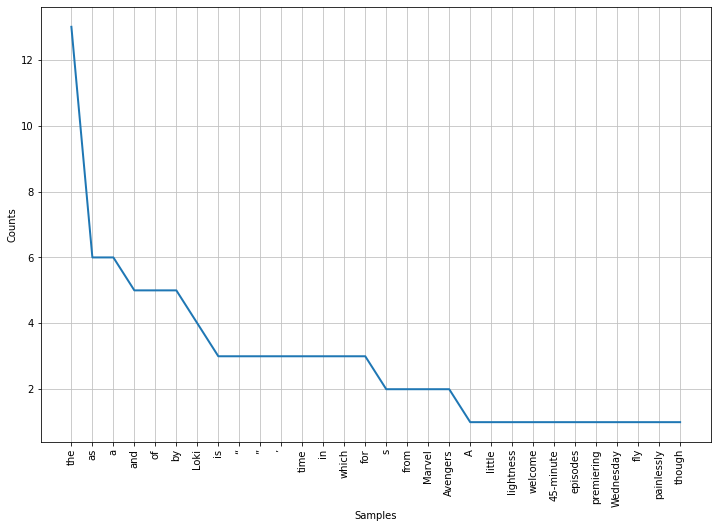

In [31]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
fdist.plot(30,cumulative=False)
plt.show()

## Nivel 2

### Ejercicio 1
**Quitar las stopwords y realiza stemming a tu conjunto de datos.**

In [32]:
# Remover 'stopwords'

from nltk.corpus import stopwords
stop_words= set(stopwords.words("english"))
print(stop_words)

{'what', 'at', 'all', 'are', 'myself', 'his', "hadn't", 'needn', 'shouldn', 'up', "haven't", 'where', 'our', 'how', "needn't", 'i', "don't", 'from', 'should', 'so', 'some', "didn't", 've', 'with', 'will', 'the', 'wasn', 'below', 'being', "you're", "she's", 't', 's', 'herself', 'shan', 'hadn', 'them', 'we', 'whom', 'yourself', 'here', 'ourselves', 'most', 'this', 'if', "weren't", "you'd", 'her', 'and', 'same', 'against', 'just', 'more', 'having', "shan't", 'y', 'that', 'both', 'weren', 'out', "you'll", 'then', 'have', 'those', 'been', 'do', 'under', 'didn', 'my', "isn't", "mustn't", 'off', 'as', 'me', 'because', "wasn't", 'but', 'she', 'above', 'an', 'o', 'nor', 'there', 'll', 'has', 'own', 'won', 'into', 'himself', 're', 'doing', 'not', 'no', 'other', 'each', 'about', 'a', 'haven', 'itself', 'of', 'these', 'again', 'd', "doesn't", 'than', 'such', 'had', 'can', "couldn't", 'why', 'your', "you've", 'between', 'before', 'him', 'it', 'which', 'in', 'wouldn', 'by', 'during', 'only', 'for', 

In [33]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['A', 'little', 'lightness', 'is', 'welcome', 'and', 'the', '45-minute', 'episodes', 'of', '“', 'Loki', '”', 'premiering', 'Wednesday', 'fly', 'by', 'painlessly', 'though', 'they', 'may', 'not', 'deliver', 'quite', 'as', 'much', 'jokey', 'satisfaction', 'per', 'minute', 'as', 'you', '’', 'd', 'like', 'If', 'the', 'writing', 'has', 'dull', 'patches', 'there', '’', 's', 'always', 'the', 'company', 'of', 'a', 'stellar', 'cast', 'headlined', 'by', 'Tom', 'Hiddleston', 'as', 'Loki', 'and', 'filled', 'out', 'by', 'Owen', 'Wilson', 'as', 'Loki', '’', 's', 'detective', 'partner', 'from', 'the', 'Time', 'Variance', 'Authority', 'Wunmi', 'Mosaku', 'as', 'a', 'SWAT', 'cop', 'of', 'the', 'pure', 'time', 'stream', 'and', 'Gugu', 'Mbatha-Raw', 'as', 'a', 'judge', 'in', 'time', 'court', 'The', 'focus', 'on', 'time', 'is', 'the', 'vehicle', 'by', 'which', 'Marvel', 'once', 'again', 'brings', 'back', 'Loki', 'who', 'was', 'killed', 'two', '“', 'Avengers', '”', 'films', 'ago', 'In', 

In [34]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['A', 'little', 'lightness', 'welcome', '45-minute', 'episodes', '“', 'Loki', '”', 'premiering', 'Wednesday', 'fly', 'painlessly', 'though', 'may', 'deliver', 'quite', 'much', 'jokey', 'satisfaction', 'per', 'minute', '’', 'like', 'If', 'writing', 'dull', 'patches', '’', 'always', 'company', 'stellar', 'cast', 'headlined', 'Tom', 'Hiddleston', 'Loki', 'filled', 'Owen', 'Wilson', 'Loki', '’', 'detective', 'partner', 'Time', 'Variance', 'Authority', 'Wunmi', 'Mosaku', 'SWAT', 'cop', 'pure', 'time', 'stream', 'Gugu', 'Mbatha-Raw', 'judge', 'time', 'court', 'The', 'focus', 'time', 'vehicle', 'Marvel', 'brings', 'back', 'Loki', 'killed', 'two', '“', 'Avengers', '”', 'films', 'ago', 'In', 'recent', 'film', '“', 'Avengers', 'Endgame', '”', 'time-travel', 'plotline', 'enabled', 'make', 'cameo', 'reappearance', 'wrinkle', 'continuum', 'series', 'explanation', 'apprehension', 'T.V.A.', 'monitors', 'past', 'present', 'future', 'divergences', 'proper', 'course', 'events', 'That'

**También opté por eliminar palabras con menos de dos letras.**

In [42]:
# remove words less than three letters
stemmed_words_new = [word for word in stemmed_words if len(word) > 2]
stemmed_words_new

['littl',
 'light',
 'welcom',
 '45-minut',
 'episod',
 'loki',
 'premier',
 'wednesday',
 'fli',
 'painlessli',
 'though',
 'may',
 'deliv',
 'quit',
 'much',
 'jokey',
 'satisfact',
 'per',
 'minut',
 'like',
 'write',
 'dull',
 'patch',
 'alway',
 'compani',
 'stellar',
 'cast',
 'headlin',
 'tom',
 'hiddleston',
 'loki',
 'fill',
 'owen',
 'wilson',
 'loki',
 'detect',
 'partner',
 'time',
 'varianc',
 'author',
 'wunmi',
 'mosaku',
 'swat',
 'cop',
 'pure',
 'time',
 'stream',
 'gugu',
 'mbatha-raw',
 'judg',
 'time',
 'court',
 'the',
 'focu',
 'time',
 'vehicl',
 'marvel',
 'bring',
 'back',
 'loki',
 'kill',
 'two',
 'aveng',
 'film',
 'ago',
 'recent',
 'film',
 'aveng',
 'endgam',
 'time-travel',
 'plotlin',
 'enabl',
 'make',
 'cameo',
 'reappear',
 'wrinkl',
 'continuum',
 'seri',
 'explan',
 'apprehens',
 't.v.a.',
 'monitor',
 'past',
 'present',
 'futur',
 'diverg',
 'proper',
 'cours',
 'event',
 'that',
 'impli',
 'predestin',
 'rais',
 'lot',
 'troubl',
 'question',
 

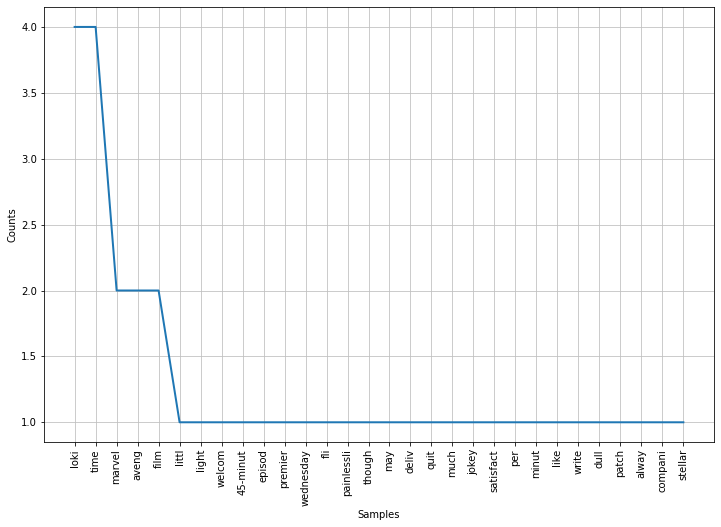

In [64]:
# Nueva frequencia

#fdist_new = FreqDist(stemmed_words_new)
#fdist_new.most_common(2)
all_words = FreqDist(stemmed_words_new)
#Plot
plt.figure(figsize=(12,8))
#fdist_new.plot(30,cumulative=False)
#plt.show()

all_words.plot(30,cumulative=False)
plt.show()

## Nivel 3

### Ejercicio 1
**Realiza sentimiento analysis a tu conjunto de datos.**

Usando el analizador de sentimientos previamente entrenado de NLTK

NLTK ya tiene incorporado un analizador de sentimientos previamente capacitado llamado VADER (Valence Aware Dictionary y sEntiment Reasoner).

Para usar VADER ( Valence Aware Dictionary for Sentiment Reasoning), primero  es necesario cargar **vader lexicon** :  una herramienta de análisis de sentimientos basada en reglas y léxico que está específicamente en sintonía con los sentimientos expresados en las redes sociales y funciona bien en textos de otros dominios. 

Entonces, vamos crear una instancia de nltk.sentiment.SentimentIntensityAnalyzer, luego use .polarity_scores () en una cadena sin procesar:

In [76]:
# cargar vader lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristianedesouzadasilva/nltk_data...


True

In [78]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text)

{'neg': 0.072, 'neu': 0.826, 'pos': 0.102, 'compound': 0.4019}

VADER devuelve un diccionario de partituras en cada una o cuatro categorías:

* negative sentiment : 0.072

* neutral sentiment : 0.826

* positive sentiment : 0.102

* compound : 0.4019
    

Las puntuaciones negativas, neutrales y positivas están relacionadas: todas suman 1.

El puntaje compuesto es una métrica que calcula la suma de todas las calificaciones de léxico que se han normalizado entre -1 (más extremo negativo) y +1 (más extremo positivo).

El texto analizado es un extracto de una reseña de una serie de televisión. Este tipo de texto tiende a ser neutral y, por lo tanto, en nuestro caso, el sentimiento neutral tuvo la puntuación más alta (0.826). Pero podemos decir que es casi imposible ser completamente neutral y el resultado muestra una puntuación positiva superior a la negativa.

Esto demuestra que el autor exhibe un sentimiento neutral al escribir pero tiende al lado positivo.